# 第三节：单因子检测

**科大财经**

1. 单因子检验理论介绍/检测指标分析

2. 单因子检验源代码python

3. Ricequant单因子检验

现代金融理论将投资组合的收益分解成Alpha和Beta两部分。其中Alpha被定义为无法被风险因子解释的超额收益，Beta被定义为由于暴露于不同的风险因子而获取的收益。从CAPM到FamaandFrench三因子模型，从APT模型到多因子模型，学术界和投资界都在努利构建一个合理的资产定价模型来解释资产收益的变动。

### 1.1 单因子检验理论介绍  
目前市场上的因子主要可划分为财务类、行情类、一致预期类、公司治理。

**风险风格：**<br>
因子根据Barra可以分为size市值，beta贝塔，momentum动量，earnings_yield盈利率，growth成长性，liquidity流动性，leverage杠杆率，book_to_price账面市值比，residual_volatility残余波动率，non_linear_size非线性市值<br>
https://zhuanlan.zhihu.com/p/31412967


**财务类：**<br>《量化多因子系列：基本面因子手册》
盈利能力、成长能力、营运效率、盈余质量、安全性因子、公司治理、估值因子、分析师因子、股东因子、规模因子

**量价类:**<br> 《量化多因子系列：价量因子手册》
动量&反转、波动率、流动率、量价相关性、筹码分布、资金流向、北向资金流、融资融券、价量复合因子

**一致预期类**<br>
分析师预测数据：个股一致预期、个股盈利预测综合指标、个股预测股价数据、行业投资评级数据、机构预测大势数据、新闻快讯

**公司治理类**<br>
ESG、第一大股东持股比例、第二至十大股东持股比例、流通股占比、公司股东数量、独立董事占比、董事会委员数量、管理层薪酬、管理层持股数量、受证监会、交易所等处罚情况、是否实施股权激励

**因子颗粒度**<br>
月度、五日、日级、分钟级别、tick级别、逐笔

### 1.2 因子清洗流程： <br>

**步骤一：原始数据处理**<br>
原始数据的选取是多因子模型的基础，只有高质量的数据才能保证后续研究的准确。研究中遇到的数据问题主要有财务数据的滞后性与真实性问题，资产重组导致前后数据不可比问题，行业划分覆盖不全面等问题。

**步骤二：股票池构造**<br>
多因子选股的第一步是选择合适的股票池，而股票池的选取需要根据策略的需求进行相应的调整。剔除ST股票和新股。

**步骤三：缺失值处理**<br>
由于缺失值处理在方法上都使用了截面均值，或直接删除缺失数据。

**步骤四：异常值处理**<br>
数据预处理的好坏很大程度上决定了模型分析结果的可靠与否。异常值的存在很有可能改变回归方程的拟合结果，据此得到的结果不合理。因此，使用正确的数据对于金融建模而言是最低限度的要求。

**步骤五：因子标准化**<br>
经过异常值处理和缺失值处理后，大部分因子仍然呈现偏态或尖峰厚尾的非正态的分布，故需要在此基础上进一步做标准化处理。目前业内采用的标准化方法有两种，z-score标准化与排名标准化。其中z-score标准化是将数据标准化为标准正态分布，一定程度的保留了因子截面信息，但是容易受到极端值的影响。排名标准化将数据标准化成均匀分布，完全忽略了因子截面的距离信息，但是可以避免极端值的影响。

**步骤六：行业中性化/Barra风格中性化**<br>
行业中性化有两种方法：
+ 1.用因子值做因变量，用所属行业（申万行业、中信行业）虚拟变量做自变量进行OLS回归，用回归之后的残差值代替因子值。 
+ 2.对因子分行业进行标准化，即减去行业均值之后再除以行业标准差.
+ 但可以证明，两种方法得到的结果是完全一样的。第一种方法的代码相对简单，并且可以和市值中性化一起进行，因此一般采用第一种方法。

市值中性化 用因子值做因变量，市值做自变量（有时也取市值对数），进行回归，取残差。 一般将行业虚拟变量和市值同时放在自变量上进行回归，同时进行市值中性化和行业中性化， 理论上可以证明，回归后的残差序列与自变量序列均正交，因此可以认为回归后的残差是因子剔除了行业和市值影响后的纯净的因子 。
https://zhuanlan.zhihu.com/p/25299965

**步骤七：单因子检测**

## 1.3 因子检验指标

**一、IC_IR检验**<br>
IC值（信息系数）是指个股第t期在因子i上的因子暴露（剔除行业与市值后）与t+ 1期的收益率的相关系数。通过计算IC值可以有效的观察到某个因子收益率预测的稳定性和动量特征，以便在优化组合时用作筛选的指标。我们采用Spearman的秩相关系数方法计算因子暴露与下期收益率的相关性IC值。类似回归法的因子测试流程，我们在计算IC时同样做了行业和市值中性的处理。类似的，我们关注以下几个与IC值相关的指标来判断因子的有效性和预测能力：<br>

1. IC值的均值<br>
2. IC值的标准差<br>
3. IC大于0的比例<br>
4. IC绝对值大于0.02的比例<br>
5. IR （IR = IC均值/IC标准差）<br>

**IC**<br>
IC即信息系数（Information Coefficient），表示所选股票的因子值与股票下期收益率的截面相关系数，通过 IC 值可以判断因子值对下期收益率的预测能力。信息系数的绝对值越大，该因子越有效。IC为负表示因子值越小越好，IC为正表示因子值越大越好。IC的计算方法是：计算全部股票在调仓周期期初排名和调仓周期期末收益排名的线性相关度（Correlation）。IC越大的因子，选股能力就越强。

IC最大值为1，表示该因子选股100%准确，对应的是排名分最高的股票，选出来的股票在下个调仓周期中，涨幅最大；相反，如果IC值为-1，则代表排名分最高的股票，在下个调仓周期中，跌幅最大，是一个完全反向的指标。实际上，反向的指标也是非常有意义的。最无用的IC值是0或者接近0的值，这代表该因子对于股票没有任何的预测能力。当IC的绝对值大于0.03时（若要求更为严格，则限制在0.05），因子的选股能力较强。

**RankIC**<br>
由于IC的值是连续型，为了防止计算过程中由于因子值差距过大，所以发明了RankIC的计算，即某时点某因子在全部股票暴露值排名与其下期回报排名的截面相关系数，它与IC的区别就是将因子的具体值以及收益的具体值，都转换为了所对应的数值在其截面上的排序名次。然后通过计算排序值的相关系数，得到RankIC。

**IR**<br>
IR即信息比率（Information Ratio），是超额收益的均值与标准差之比，可以根据 IC 近似计算，公式如下。该公式是从超额收益出发，逐步推导得出的。IR= IC的多周期均值/IC的标准方差，代表因子获取稳定Alpha的能力。整个回测时段由多个调仓周期组成，每一个周期都会计算出一个不同的IC值，IR等于多个调仓周期的IC均值除以这些IC的标准方差。所以IR兼顾了因子的选股能力（由IC代表）和因子选股能力的稳定性（由IC的标准方差的倒数代表），当IR大于0.5时因子稳定获取超额收益能力较强。

**二、分层效应检验/多空效应**<br>
为了同时能够展示所检验因子的单调性以及多空组合的收益情况，我们通过分层打分回溯的方法作为补充。进行分层回溯时，我们在各期期末将全市场A股按照因子值大小排序分成5等分，在分组时同样做行业中性处理，即在中信一级行业内做5等分组，组内市值加权。<br>

**三、t检验**<br>
原假设因子ic序列为0，T检验主要来验证显著拒绝该原假设，使用单样本提检验进行。我们将通过以下几个指标来判断该因子的有效性以及稳定性：<br>
1. 因子收益序列fi的假设检验t值
2. 因子收益序列fi大于0的概率
3. t值绝对值的均值
4. t值绝对值大于等于2的概率

**四、 换手率检验**<br>
考察因子的每次调仓的换手率水平，换手率越高所承担交易成本越高，

In [1]:
import pandas as pd 
import numpy as np
from data_clean import *
from rqdatac import *
from rqfactor import *
from rqfactor.notebook import *
from rqfactor.extension import *
init()

/usr/local/envs/Python3.9/lib/python3.9/site-packages/rqdatac/client.py:197: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


# 基础设置

In [2]:
# 研究时间
start_date = input("start_date:")   # 【example】：2020-01-01
end_date = input("end_date:")       # 【example】：2022-11-01
# 研究标的
index_item = input("index:")             # 【example】：全A 000985.XSHG 中证1000 000852.XSHG

# 股票池
index = pd.DataFrame()
trade_days = get_trading_dates(start_date, end_date, market='cn')   #获取期间交易日信息
for i in trade_days:
    index_day = pd.DataFrame(rqdatac.index_components(index_item, i),columns = [i]).T
    index = pd.concat([index,index_day],axis = 0)
    print('\r 当前：{} / 总量：{}'.format(i,trade_days[-1]),end='')

# 构建动态股票池 
index_fix = index.unstack().reset_index().iloc[:,-2:]
index_fix.columns = ['date','stock']
index_fix.date = pd.to_datetime(index_fix.date)
index_fix['level'] = True
index_fix.dropna(inplace = True)
index_fix = index_fix.drop_duplicates(subset=['date','stock'], keep='first').set_index(['date','stock']).unstack()
index_fix.fillna(False,inplace = True)
index_fix = index_fix.T.reset_index().iloc[:,1:].set_index(['stock']).T
# 获取日期 和 标的
stock_list_whole = index_fix.columns.tolist()
date_list_whole = index_fix.index.tolist()

start_date:2020-01-01
end_date:2022-11-01
index:000852.XSHG
 当前：2022-11-01 / 总量：2022-11-01

# 因子构建

In [4]:
#获取因子数据
f = Factor('cash_flow_from_operating_activities_mrq_0')/Factor('total_assets_mrq_0')
cfoa = execute_factor(f,stock_list_whole,start_date,end_date)

In [5]:
cfoa

,000006.XSHE,000011.XSHE,000016.XSHE,000019.XSHE,000025.XSHE,000030.XSHE,000032.XSHE,000034.XSHE,000035.XSHE,000036.XSHE,...,688578.XSHG,688586.XSHG,688598.XSHG,688608.XSHG,688617.XSHG,688680.XSHG,688686.XSHG,688696.XSHG,688699.XSHG,688788.XSHG
2020-01-02,-0.013011,0.094834,-0.012710,0.067659,0.016935,0.005623,0.024482,0.032579,0.016774,0.058799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.013011,0.094834,-0.012710,0.067659,0.016935,0.005623,0.024482,0.032579,0.016774,0.058799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-0.013011,0.094834,-0.012710,0.067659,0.016935,0.005623,0.024482,0.032579,0.016774,0.058799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,-0.013011,0.094834,-0.012710,0.067659,0.016935,0.005623,0.024482,0.032579,0.016774,0.058799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,-0.013011,0.094834,-0.012710,0.067659,0.016935,0.005623,NaN,0.032579,0.016774,0.058799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26,0.014908,0.024158,0.005333,0.005759,0.002298,0.008303,0.005392,0.022688,0.018521,-0.006115,...,0.01816,-0.002478,0.060656,-0.039920,0.051727,-0.187827,-0.026141,0.005172,0.021534,-0.018540
2022-10-27,0.038954,0.024158,0.005333,0.005759,0.002298,-0.002822,-0.000381,0.022688,0.018521,0.014538,...,0.01816,-0.008895,0.060656,-0.039920,0.046675,-0.187827,-0.026141,0.005172,0.021534,-0.018540
2022-10-28,0.038954,0.024158,0.009017,0.061968,-0.035165,-0.002822,-0.000381,0.036254,-0.000992,0.014538,...,0.00870,-0.008895,0.005228,-0.005016,0.046675,-0.138690,-0.026141,-0.034066,0.021534,0.000516
2022-10-31,0.038954,0.023736,0.009017,0.061968,-0.035165,-0.002822,-0.000381,0.036254,-0.000992,0.014538,...,0.00870,-0.008895,0.005228,-0.005016,0.046675,-0.138690,-0.026141,-0.034066,-0.066716,0.000516


# 数据清洗

In [4]:
new_stock_filter = get_new_stock_filter(stock_list_whole,date_list_whole)
st_filter = get_st_filter(stock_list_whole,date_list_whole)
suspended_filter = get_suspended_filter(stock_list_whole,date_list_whole)
limit_up_down_filter = get_limit_up_down_filter(stock_list_whole,date_list_whole)

def data_clean(factor,new_stock_filter = new_stock_filter,st_filter = st_filter,suspended_filter = suspended_filter,limit_up_down_filter = limit_up_down_filter,index_fix= index_fix):
    # 剔除ST、涨停、停牌、新股
    factor = factor.mask(new_stock_filter).mask(st_filter).mask(suspended_filter).mask(limit_up_down_filter).mask(~index_fix).dropna(how = 'all')
    print('券池过滤完毕')
    # 离群值处理
    factor = factor.apply(lambda x :filter_extreme_MAD(x,3), axis=1)
    # 标准化
    factor = factor.sub(factor.mean(axis=1), axis=0).div(factor.std(axis=1), axis=0) #add
    print('因子数据清洗完成，已剔除离群值、中性化处理')
    # 行业市值中性化
    factor = neutralization(factor)
    print('因子完成行业市值中性化')
    
    return factor

cfoa = data_clean(cfoa)

剔除新股已构建
剔除ST已构建
剔除停牌已构建
剔除开盘涨停已构建
券池过滤完毕
因子数据清洗完成，已剔除离群值、中性化处理
中信行业数据已获取
动态行业数据已构建
因子完成行业市值中性化


# 单因子检验

In [9]:
cfoa_Result = Factor_Return_N_IC(cfoa,20)
ic_ir(cfoa_Result)

['IC mean:0.018',
 'IC std:0.037',
 'IR:0.4864',
 'IC>0:0.6752',
 'ABS_IC>2%:0.5398',
 't_stat:12.5434',
 'p_value:0.0',
 'skew:0.3329',
 'kurtosis:-0.2338']

# 分层效应检验

 当前：680 / 总量：685

<AxesSubplot:title={'center':'分层效应检验'}, xlabel='date'>

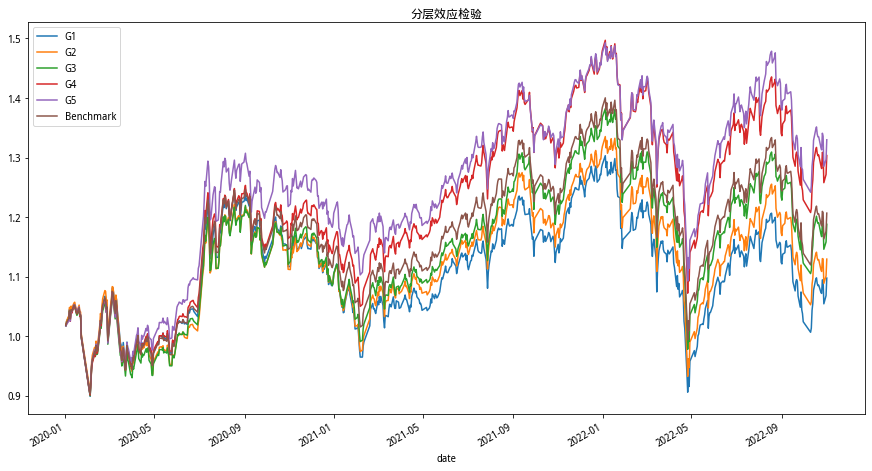

In [6]:
group1_5_period,turnover = group_5(cfoa,20)
group1_5_period.columns = ['G1','G2','G3','G4','G5']
group1_5_period['Benchmark'] = group1_5_period.mean(axis = 1)
group1_5_period = (group1_5_period+1).cumprod()
group1_5_period.plot(figsize = (15,8),title = '分层效应检验')

# 多空效应检验

<AxesSubplot:title={'center':'多空效应检验'}, xlabel='date'>

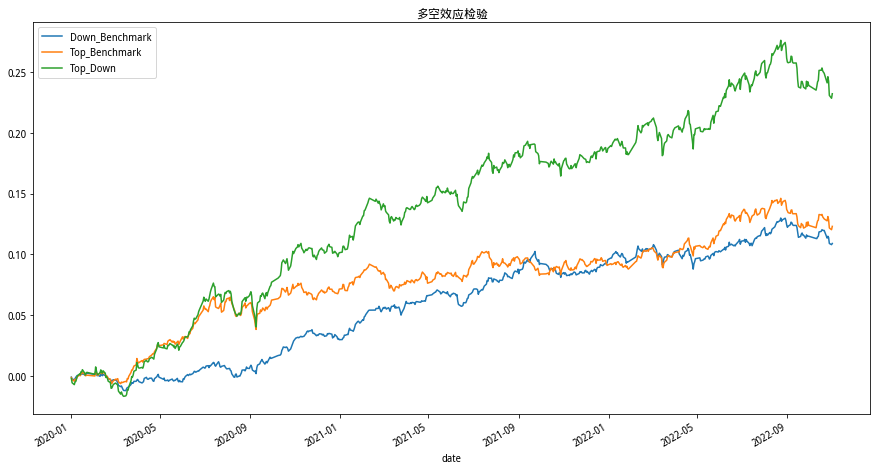

In [7]:
Down_Benchmark = -(group1_5_period['G1'] - group1_5_period['Benchmark'])
Top_Benchmark = group1_5_period['G5'] - group1_5_period['Benchmark']
Top_Down = group1_5_period['G5'] - group1_5_period['G1']
TBD = pd.concat([Down_Benchmark,Top_Benchmark,Top_Down],axis = 1)
TBD.columns = ['Down_Benchmark','Top_Benchmark','Top_Down']
TBD.plot(figsize = (15,8),title = '多空效应检验')

# 换手率

G1    0.117498
G2    0.146784
G3    0.155383
G4    0.151195
G5    0.126821
dtype: float64


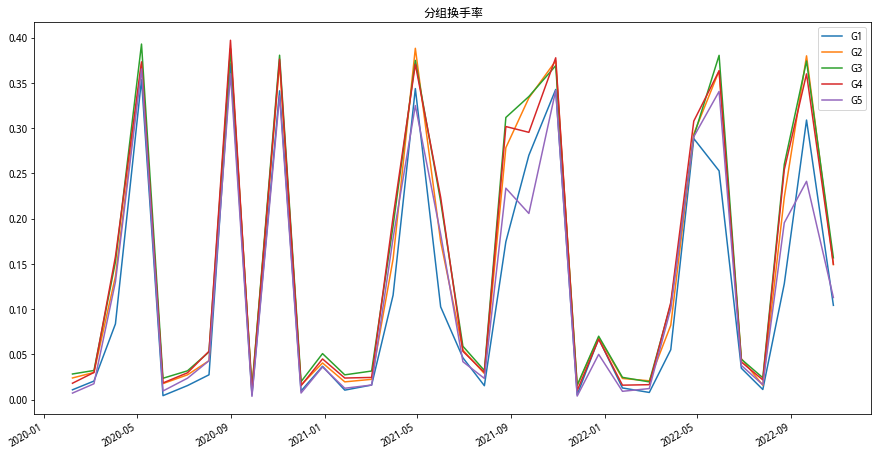

In [8]:
turnover.plot(figsize = (15,8),title = '分组换手率')
print(turnover.mean())